In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print("Image Data shape", digits.data.shape)

Image Data shape (1797, 64)


In [4]:
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


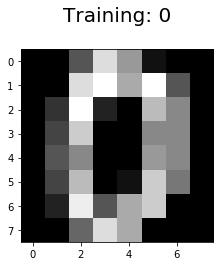

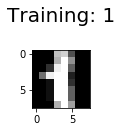

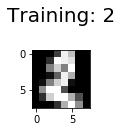

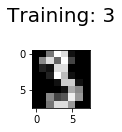

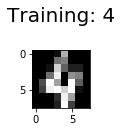

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
 plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
x_train.shape

(1347, 64)

In [10]:
y_train.shape

(1347,)

In [11]:
x_test.shape

(450, 64)

In [12]:
y_test.shape

(450,)

In [13]:
y_pred = logisticRegr.predict(x_test)

In [15]:
# Use score method to get accuracy of model
test_score = logisticRegr.score(x_test, y_test)
print(test_score)

0.9533333333333334


In [16]:
train_score=logisticRegr.score(x_train,y_train)
train_score

0.9962880475129918

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6


In [18]:
# Returns a NumPy Array
# Predict for One Observation (image)

pred = logisticRegr.predict(x_test[0].reshape(1,-1))
pred

array([2])

In [19]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [21]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


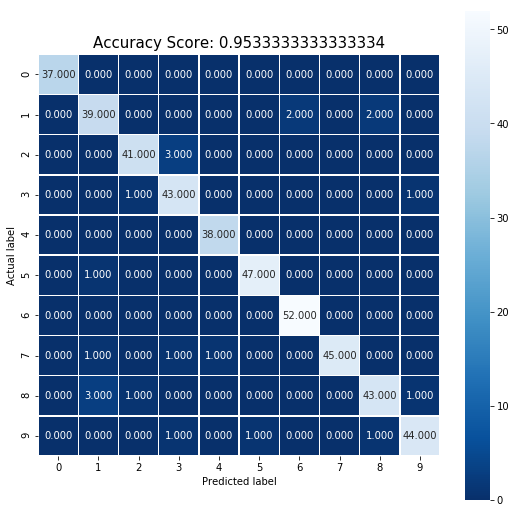

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);